In [ ]:
import numpy as np
import pandas as pd
import os
import sys
import os
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k
import keras
from tensorflow import keras

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

In [ ]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
base_model.trainable = False

In [ ]:
from keras.models import Model
from keras.layers import *

# Create inputs with correct shape
inputs = Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = Flatten()(x)

# Add a hidden layer
x = Dense(256, activation='relu')(x)

# Add a dropout layer
x = Dropout(.5)(x)

# Add final dense layer
outputs = Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = Model(inputs, outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               12845312  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 19,884,358
Trainable params: 12,846,854
Non-tra

In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=["accuracy"],
             optimizer = 'nadam')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transformation_ratio = 0.05

datagen = ImageDataGenerator(rescale=1. / 255,
                             validation_split = 0.2,
                             rotation_range=transformation_ratio,
                             shear_range=transformation_ratio,
                             zoom_range=transformation_ratio,
                             cval=transformation_ratio,
                             horizontal_flip=True,
                             vertical_flip=True)

In [ ]:
# load and iterate training dataset
train_it = datagen.flow_from_directory("/content/drive/MyDrive/FruitsFreshness/dataset/dataset/train", 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical",
                                       batch_size=12,
                                       subset = "training")

# Validation Data
val_it = datagen.flow_from_directory("/content/drive/MyDrive/FruitsFreshness/dataset/dataset/train",
                                     target_size=(224,224),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=12,
                                     subset='validation')

# load and iterate test dataset
test_it = datagen.flow_from_directory("/content/drive/MyDrive/FruitsFreshness/dataset/dataset/test", 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
history = model.fit_generator(generator = train_it,
                              steps_per_epoch=train_it.samples/train_it.batch_size,
                              epochs=6,
                              validation_data=val_it,
                              validation_steps=test_it.samples/test_it.batch_size,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/6
726/726 [==============================] - 1665s 2s/step - loss: 0.9135 - accuracy: 0.8108 - val_loss: 0.0837 - val_accuracy: 0.9716
Epoch 2/6
726/726 [==============================] - 1655s 2s/step - loss: 0.3331 - accuracy: 0.8839 - val_loss: 0.0871 - val_accuracy: 0.9706
Epoch 3/6
726/726 [==============================] - 1661s 2s/step - loss: 0.2570 - accuracy: 0.9081 - val_loss: 0.0694 - val_accuracy: 0.9745
Epoch 4/6
726/726 [==============================] - 1691s 2s/step - loss: 0.2775 - accuracy: 0.9007 - val_loss: 0.0416 - val_accuracy: 0.9824
Epoch 5/6
726/726 [==============================] - 1647s 2s/step - loss: 0.2418 - accuracy: 0.9147 - val_loss: 0.0383 - val_accuracy: 0.9922
Epoch 6/6
726/726 [==============================] - 1647s 2s/step - loss: 0.2344 - accuracy: 0.9224 - val_loss: 0.0197 - val_accuracy: 0.9922


In [ ]:
model.save('/content/drive/MyDrive/FruitsFreshness/fruit_model.h5')

In [ ]:
import matplotlib.pyplot as plt

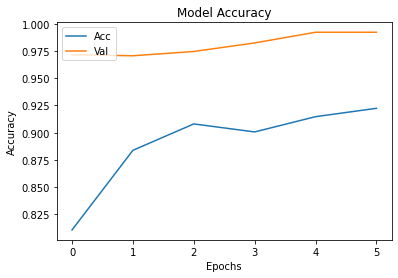

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

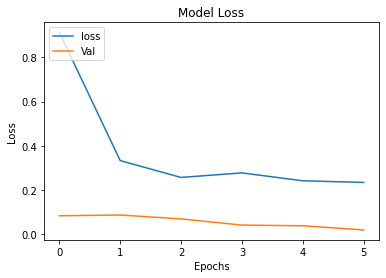

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [ ]:
model.evaluate(test_it, steps=test_it.samples/test_it.batch_size)

84/84 [==============================] - 676s 8s/step - loss: 0.0612 - accuracy: 0.9796


[0.06123065948486328, 0.9796145558357239]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from keras.preprocessing import image

In [ ]:
def predict_image(photo):
  labels = ["freshapples","freshbanana","freshoranges","rottenapples","rottenbanana","rottenoranges"]  
  test_image = image.load_img(photo, target_size = (224,224))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  test_image = test_image/255
  i = plt.imread(photo)
  plt.imshow(i)
  plt.axis('off')
  pred = model.predict([test_image])[0]
  result = np.argmax(pred,axis=-1)

  return (labels[result])
  



  

'rottenoranges'

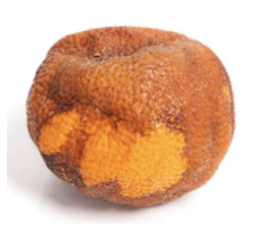

In [ ]:
predict_image('/content/drive/MyDrive/FruitsFreshness/dataset/dataset/test/rottenoranges/Screen Shot 2018-06-12 at 11.42.38 PM.png')

In [ ]:
test_it.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

'rottenapples'

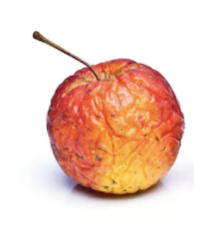

In [ ]:
predict_image("/content/drive/MyDrive/FruitsFreshness/dataset/dataset/test/rottenapples/Screen Shot 2018-06-07 at 2.18.25 PM.png")

'rottenapples'

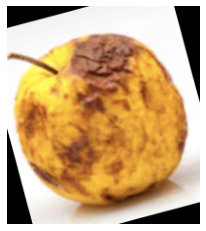

In [ ]:
predict_image('/content/drive/MyDrive/FruitsFreshness/dataset/dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.36.21 PM.png')

'freshapples'

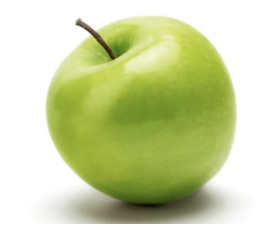

In [ ]:
predict_image('/content/drive/MyDrive/FruitsFreshness/dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png')

'freshbanana'

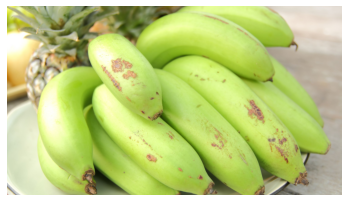

In [ ]:
predict_image('/content/close-up-of-bananas-in-plate-on-table-675604551-588b9f1a3df78caebc609be9.jpg')

'freshbanana'

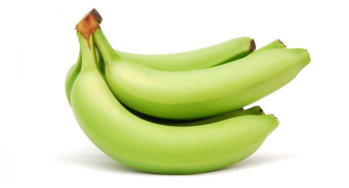

In [ ]:
predict_image('/content/green-banana-header.jpg')